## Probability in Python

In [1]:
%load_ext watermark

In [2]:
%watermark --author "Ryan Sloot |" -d -v

Ryan Sloot | 2016-09-22 

CPython 3.5.1
IPython 4.2.0


In [3]:
from comp_prob_inference import *
%matplotlib inline

In [4]:
flip_fair_coin()

'tails'

In [5]:
flips = flip_fair_coins(100)

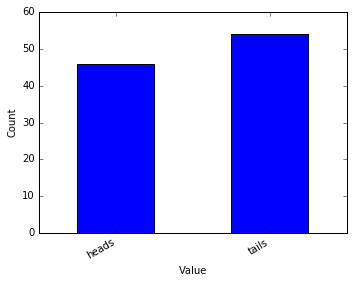

In [6]:
plot_discrete_histogram(flips)
plt.show()

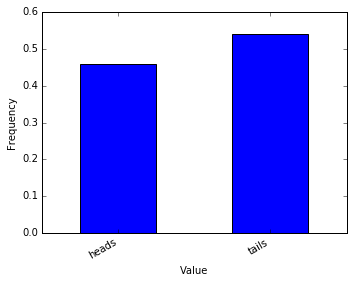

In [7]:
plot_discrete_histogram(flips, frequency=True)

In [8]:
## 100,000 flips
n = 100000
heads_so_far = 0
fraction_of_heads = []
for i in range(n):
    if flip_fair_coin()=='heads':
        heads_so_far += 1
    fraction_of_heads.append(heads_so_far / (i+1))

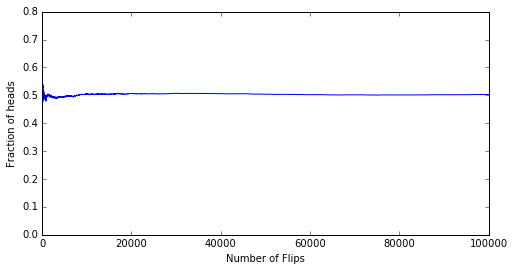

In [9]:
plt.figure(figsize=(8,4))
plt.plot(range(1,n+1), fraction_of_heads)
plt.xlabel('Number of Flips')
plt.ylabel('Fraction of heads')
plt.show()

***
### Two Ingredients to Modeling Uncertainty
- sample space
- probability of each event

In [10]:
model = {'heads': 1/2, 'tails':1/2}
sample_space = set(model.keys())

In [11]:
model['heads']
sample_space

{'heads', 'tails'}

In [12]:
model = {1: 0.4, 2:0.3, 'cat':0.3}
set(model.keys())

{1, 2, 'cat'}

In [13]:
{k: 1/6 for k in range(1,7)}

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

In [14]:
two_die_sample_space=\
        {(k,j): 1/36 for k in range(1,7) for j in range(1,7)}

### Events

In [15]:
sample_space = {'HH', 'HT', 'TH', 'TT'}
A = {'HT', 'TT'} # T second flip
B = {'HH', 'HT', 'TH'} # at least one H
C = {'HH'} #both heads
A_intersect_B = A.intersection(B)
A_union_C = A.union(C)
B_complement = sample_space.difference(B)

In [16]:
print(A_intersect_B, A_union_C, B_complement)

{'HT'} {'HH', 'HT', 'TT'} {'TT'}


In [17]:
def prob_of_event(event, prob_space):
    total = 0
    for outcome in event:
        total += prob_space[outcome]
    return total

In [18]:
prob_space = {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}
rainy_or_snowy_event = {'rainy', 'snowy'}
print(prob_of_event(rainy_or_snowy_event, prob_space))

0.5


***
sample space $\Omega$ has size $|\Omega|$ = m, there are $2^m$ events
***

***
rolling two six-sided die what is event sum of faces is 7?

In [19]:
space = dict()

rolls = [(i,j) for i in range(1,7) for j in range(1,7)]
for roll in rolls:
    if sum(roll) in space:
        space[sum(roll)].append(roll)
    else:
        space[sum(roll)] = [roll]
space

{2: [(1, 1)],
 3: [(1, 2), (2, 1)],
 4: [(1, 3), (2, 2), (3, 1)],
 5: [(1, 4), (2, 3), (3, 2), (4, 1)],
 6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
 7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
 8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
 9: [(3, 6), (4, 5), (5, 4), (6, 3)],
 10: [(4, 6), (5, 5), (6, 4)],
 11: [(5, 6), (6, 5)],
 12: [(6, 6)]}

In [20]:
space_ = {k:len(v) for (k,v) in space.items()}
space_ = {k:v/sum(space_.values()) for (k,v) in space_.items()}

In [21]:
assert space_[7] == 1/6, "Wrong"
print('Passed')

Passed


In [22]:
set(space[7])

{(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)}

***
## Random Variables

In [23]:
prob_space = {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}

In [24]:
random_outcome = sample_from_finite_probability_space(prob_space)
W = random_outcome
if random_outcome == 'sunny':
    I = 1
else:
    I = 0

In [25]:
print('I: %d, W: %s' % (I,W))

I: 0, W: snowy


In [26]:
## mapping I and W r.v.s
W_mapping = {k:k for k in prob_space.keys()}
I_mapping = {'sunny': 1, 'rainy': 0, 'snowy': 0}

In [27]:
random_outcome = sample_from_finite_probability_space(prob_space)
W = W_mapping[random_outcome]
I = I_mapping[random_outcome]
print('I: %d, W: %s' % (I,W))

I: 0, W: rainy


In [28]:
## stored as probability tables
W_table = prob_space.copy()
I_table = {0: 1/2, 1:1/2}

In [29]:
W = sample_from_finite_probability_space(W_table)
I = sample_from_finite_probability_space(I_table)
print('I: %d, W: %s' % (I,W))

I: 1, W: snowy


***

In [30]:
prob_space = {'cat': 0.2, 'dog':0.7, 'shark':0.1}

In [31]:
X = {'cat': 5, 'dog': 5, 'shark': 7}

In [32]:
space_

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

In [33]:
f_W = {3: 2/3, 42: 1/3}

In [34]:
f_W_sq = {k**2:v for (k,v) in f_W.items()}

In [35]:
f_W_sq

{9: 0.6666666666666666, 1764: 0.3333333333333333}

***

### Jointly Distributed r.v.s

In [36]:
## bad example might be representing as dict
prob_table = {('sunny', 'hot'): 3/10,
               ('sunny', 'cold'): 1/5,
               ('rainy', 'hot'): 1/30,
               ('rainy', 'cold'): 2/15,
               ('snowy', 'hot'): 0,
               ('snowy', 'cold'): 1/3}
## W=rainy T=cold
prob_table[('rainy', 'cold')]

0.13333333333333333

In [37]:
## better nested dictionaries
weather = {'sunny','rainy','snowy'}
prob_W_T_dict = {w: {} for w in weather}

In [38]:
## and assign each
prob_W_T_dict['sunny']['hot'] = 3/10
prob_W_T_dict['sunny']['cold'] = 1/5
prob_W_T_dict['rainy']['hot'] = 1/30
prob_W_T_dict['rainy']['cold'] = 2/15
prob_W_T_dict['snowy']['hot'] = 0
prob_W_T_dict['snowy']['cold'] = 1/3

In [39]:
print_joint_prob_table_dict(prob_W_T_dict)

           cold       hot
rainy  0.133333  0.033333
snowy  0.333333  0.000000
sunny  0.200000  0.300000


In [40]:
## W=rainy T=cold
prob_W_T_dict['rainy']['cold']

0.13333333333333333

In [41]:
## better? 2d array
import numpy as np
prob_W_T_rows = ['sunny', 'rainy', 'snowy']
prob_W_T_cols = ['hot', 'cold']
prob_W_T_array = np.array([[3/10, 1/5], [1/30, 2/15], [0, 1/3]])

print_joint_prob_table_array(prob_W_T_array, prob_W_T_rows,
                             prob_W_T_cols)

            hot      cold
sunny  0.300000  0.200000
rainy  0.033333  0.133333
snowy  0.000000  0.333333


In [42]:
## W=rainy T=cold
prob_W_T_array[prob_W_T_rows.index('rainy'),
               prob_W_T_cols.index('cold')]

0.13333333333333333

In [43]:
## map to index
prob_W_T_row_mapping = {label: idx 
                        for idx, label in enumerate(prob_W_T_rows)}
prob_W_T_col_mapping = {label: idx
                        for idx, label in enumerate(prob_W_T_cols)}

In [44]:
## W=w T=t
w='rainy'
t='cold'
prob_W_T_array[prob_W_T_row_mapping[w],
               prob_W_T_col_mapping[t]]

0.13333333333333333

***
### Marginalization

In [45]:
X = {w: {} for w in weather}
X['sunny'] = 1/2
X['rainy'] = 1/6
X['snowy'] = 1/3
X

{'rainy': 0.16666666666666666, 'snowy': 0.3333333333333333, 'sunny': 0.5}

In [46]:
Y = {1: 1/2, 0: 1/2}
Y

{0: 0.5, 1: 0.5}

***
## Simpson's Paradox

In [47]:
from simpsons_paradox_data import *

In [48]:
'''
    example p_(G,D,A)(female, C, admitted)
    G: gender, D: department applied to (A-F), A: admitted or rejected
'''
# prob women applied to department C and admitted
joint_prob_table[gender_mapping['female'],
                 department_mapping['C'],
                 admission_mapping['admitted']]

0.044547061422890007

In [49]:
joint_prob_gender_admission = joint_prob_table.sum(axis=1)
## droping department (axis 1)
joint_prob_gender_admission

array([[ 0.12298277,  0.2824525 ],
       [ 0.2646973 ,  0.32986743]])

In [50]:
## female apply and admitted
joint_prob_gender_admission[gender_mapping['female'],
                            admission_mapping['admitted']]

0.12298276623950503

In [51]:
## conditioning: admission given applicant is female
female_only = joint_prob_gender_admission[gender_mapping['female']]

In [52]:
prob_admission_given_female = female_only / np.sum(female_only)

In [53]:
## as dict
prob_admission_given_female_dict = \
    dict(zip(admission_labels, prob_admission_given_female))
prob_admission_given_female_dict

{'admitted': 0.30333514986376009, 'rejected': 0.69666485013623991}

In [54]:
## admission give male
males = joint_prob_gender_admission[gender_mapping['male']]
admission_male = males / np.sum(males)
admission_given_male = dict(zip(admission_labels, admission_male))
admission_given_male

{'admitted': 0.44519509476031227, 'rejected': 0.55480490523968773}

In [55]:
admitted_only = joint_prob_gender_admission[:, 
                                admission_mapping['admitted']]

In [56]:
## prob of gender give admitted
prob_gender_given_admitted = admitted_only / np.sum(admitted_only)
prob_gender_given_admitted_dict = dict(zip(gender_labels, prob_gender_given_admitted))
print(prob_gender_given_admitted_dict)

{'female': 0.31722746546300079, 'male': 0.68277253453699915}


In [57]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['A']]

female_and_A_only[admission_mapping['admitted']] / female_and_A_only.sum()

0.8200000000000004

In [58]:
# print(department_labels)
def gender_dep_mapper(g, d, a):
    g_and_d_only = joint_prob_table[gender_mapping[g], 
                                    department_mapping[d]]
    return g_and_d_only[admission_mapping[a]] / g_and_d_only.sum()


In [59]:
female_admitted_given_d_and_g = {l:gender_dep_mapper('female',l, 'admitted') 
                                 for l in department_labels}

In [60]:
male_admitted_given_d_and_g = {l:gender_dep_mapper('male',l, 'admitted') 
                               for l in department_labels}

In [61]:
fem, mal = [], []

In [62]:
for i in department_labels:
    f = female_admitted_given_d_and_g[i]
    m = male_admitted_given_d_and_g[i]
    print('%s: female: %.4f | male: %.4f' % (i, f, m))

A: female: 0.8200 | male: 0.6200
B: female: 0.6800 | male: 0.6300
C: female: 0.3400 | male: 0.3700
D: female: 0.3500 | male: 0.3300
E: female: 0.2400 | male: 0.2800
F: female: 0.0700 | male: 0.0600


***
## Alice Hunts Dragons


In [63]:
def pmf(x,y):
    x_constraints = {1,2,4}
    y_constraints = {1,3}
    if x in x_constraints and y in y_constraints:
#         print((x,y))
        return [(x,y), x**2 + y**2]
    return 0

In [64]:
xs = {1,2,3,4}
ys = {1,2,3}
p = {}
for x in xs:
    for y in ys:
        pmf_ = pmf(x,y)
        if pmf_:
            p[pmf_[0]] = pmf_[1]
c = sum(p.values())
print(c)

72


In [65]:
p.items()

dict_items([((1, 3), 10), ((2, 3), 13), ((4, 3), 25), ((4, 1), 17), ((1, 1), 2), ((2, 1), 5)])

In [66]:
## P(Y<X)
sum(list(map(lambda x: x[1] if (x[0][1]<x[0][0]) else 0, p.items())))/72

0.6527777777777778

In [67]:
## P(Y=3)
sum(list(map(lambda x: x[1] if (x[0][1]==3) else 0, p.items())))/72

0.6666666666666666

In [68]:
p

{(1, 1): 2, (1, 3): 10, (2, 1): 5, (2, 3): 13, (4, 1): 17, (4, 3): 25}

In [69]:
pmf_p = {k:v/72 for k,v in p.items()}

In [70]:
pmf_p

{(1, 1): 0.027777777777777776,
 (1, 3): 0.1388888888888889,
 (2, 1): 0.06944444444444445,
 (2, 3): 0.18055555555555555,
 (4, 1): 0.2361111111111111,
 (4, 3): 0.3472222222222222}

In [71]:
px = {}
for x in xs:
    for k,v in pmf_p.items():
#         print(k, x)
        if x == k[0]:
            if x in px:
                px[x] += v
            else:
                px[x] = v
        elif x not in px:
            px[x] = 0
print(px, sum(px.values()))

{1: 0.16666666666666669, 2: 0.25, 3: 0, 4: 0.5833333333333333} 1.0


In [72]:
py = {}
for y in ys:
    for k,v in pmf_p.items():
#         print(k, x)
        if y == k[1]:
            if y in py:
                py[y] += v
            else:
                py[y] = v
        elif y not in py:
            py[y] = 0
print(py, sum(py.values()))

{1: 0.33333333333333337, 2: 0, 3: 0.6666666666666666} 1.0


***
***

## Summary
A nice intro to probability using python here. Going through probability spaces, random variablce (joint/disjoint), conditioning, PMFs, Bayes Rule and total probability theorem. Fairly basic stuff but made sort of awesome with Python! I don't understand why probability isn't always taught through programming, it eliminates tedious summing and integrating with pmfs and cdfs or counting problems, visually with dictionaries you immediately get to see (small) samples spaces and it helps focuse more on underlying thoeries. Up next with probability is independence:structure in distributions, measures of randomness: entropy and information divergence and mutual information. Followed up with movie recommendations side project I'm finishing.